In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("fraud.csv")

In [3]:
df.head()

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601


In [4]:
df.tail()

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
4999995,T5099995,2023-11-17T23:20:29.746144,ACC597319,ACC749300,10.87,withdrawal,retail,Toronto,atm,False,NaN,1416.524233,-0.14,17,0.18,UPI,243.92.38.163,D4439579
4999996,T5099996,2023-09-23T11:23:20.659686,ACC749625,ACC709783,181.40,payment,grocery,Sydney,atm,False,NaN,999.089702,-1.79,4,0.58,wire_transfer,28.252.18.249,D5029311
4999997,T5099997,2023-11-18T00:52:34.527092,ACC629492,ACC680736,12.54,payment,utilities,New York,mobile,False,NaN,3871.584025,-0.30,6,0.99,card,111.199.174.121,D6333607
4999998,T5099998,2023-03-25T04:32:13.609837,ACC984720,ACC296935,376.29,deposit,restaurant,Dubai,pos,False,NaN,-4096.765453,-1.43,5,0.32,wire_transfer,221.110.215.14,D1551203
4999999,T5099999,2023-09-02T04:34:34.583803,ACC120255,ACC440137,7.27,transfer,grocery,Sydney,atm,False,NaN,5257.349021,0.08,14,0.40,wire_transfer,246.68.126.184,D1505627


In [5]:
df.shape

(5000000, 18)

In [6]:
df.columns

Index(['transaction_id', 'timestamp', 'sender_account', 'receiver_account',
       'amount', 'transaction_type', 'merchant_category', 'location',
       'device_used', 'is_fraud', 'fraud_type', 'time_since_last_transaction',
       'spending_deviation_score', 'velocity_score', 'geo_anomaly_score',
       'payment_channel', 'ip_address', 'device_hash'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               object 
 3   receiver_account             object 
 4   amount                       float64
 5   transaction_type             object 
 6   merchant_category            object 
 7   location                     object 
 8   device_used                  object 
 9   is_fraud                     bool   
 10  fraud_type                   object 
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              object 
 16  ip_address                   object 
 17  device_hash                  object 
dtypes: bool(1), float64(4), int64(1), object(1

In [8]:
df.describe()

,amount,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score
count,5.000000e+06,4.103487e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,3.589343e+02,1.525799e+00,-3.881160e-04,1.050132e+01,5.000293e-01
std,4.699333e+02,3.576569e+03,1.000807e+00,5.766842e+00,2.886349e-01
min,1.000000e-02,-8.777814e+03,-5.260000e+00,1.000000e+00,0.000000e+00
25%,2.657000e+01,-2.562376e+03,-6.800000e-01,5.000000e+00,2.500000e-01
50%,1.386700e+02,8.442747e-01,0.000000e+00,1.100000e+01,5.000000e-01
75%,5.038900e+02,2.568339e+03,6.700000e-01,1.600000e+01,7.500000e-01
max,3.520570e+03,8.757758e+03,5.020000e+00,2.000000e+01,1.000000e+00


In [9]:
df.isnull().sum()

transaction_id                       0
timestamp                            0
sender_account                       0
receiver_account                     0
amount                               0
transaction_type                     0
merchant_category                    0
location                             0
device_used                          0
is_fraud                             0
fraud_type                     4820447
time_since_last_transaction     896513
spending_deviation_score             0
velocity_score                       0
geo_anomaly_score                    0
payment_channel                      0
ip_address                           0
device_hash                          0
dtype: int64

In [10]:
df["transaction_id"].duplicated().any()

False

In [11]:
df = df.drop("transaction_id", axis=1, errors='ignore')

In [12]:
df['time_since_last_transaction'] = df['time_since_last_transaction'].fillna(df['time_since_last_transaction'].mean())

<Axes: >

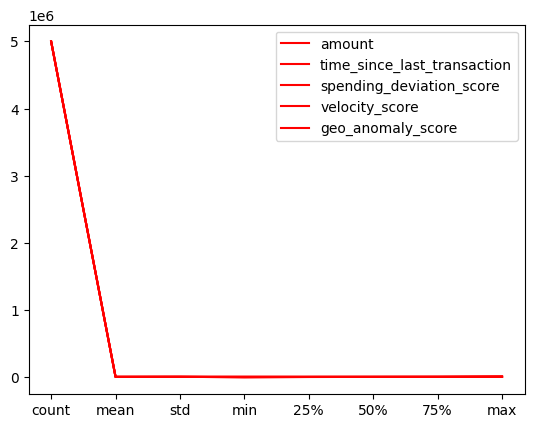

In [13]:
df.describe().plot(kind='line', color='r')

In [14]:
df['timestamp']= pd.to_datetime(df['timestamp'],errors='coerce')
df['month'] =df['timestamp'].dt.month
df['month'].value_counts()

month
8.0     425546
3.0     425454
10.0    424906
1.0     424718
12.0    424558
7.0     424492
5.0     423451
9.0     411277
11.0    411100
4.0     411054
6.0     410890
2.0     382551
Name: count, dtype: int64

In [15]:
df.value_counts()

timestamp                   sender_account  receiver_account  amount   transaction_type  merchant_category  location  device_used  is_fraud  fraud_type        time_since_last_transaction  spending_deviation_score  velocity_score  geo_anomaly_score  payment_channel  ip_address       device_hash  month
2023-01-01 01:46:11.752860  ACC236684       ACC827361         192.74   withdrawal        entertainment      London    mobile       True      card_not_present  -2528.076898                 -0.50                     18              0.28               wire_transfer    158.170.9.138    D1251166     1.0      1
2023-09-02 09:48:26.522515  ACC979984       ACC489908         14.69    transfer          restaurant         Dubai     mobile       True      card_not_present  -797.066515                  -1.55                     19              0.49               wire_transfer    22.51.113.162    D3010111     9.0      1
2023-09-02 09:32:37.262114  ACC580155       ACC180293         200.03   withdrawal   

In [16]:
df.dtypes

timestamp                      datetime64[ns]
sender_account                         object
receiver_account                       object
amount                                float64
transaction_type                       object
merchant_category                      object
location                               object
device_used                            object
is_fraud                                 bool
fraud_type                             object
time_since_last_transaction           float64
spending_deviation_score              float64
velocity_score                          int64
geo_anomaly_score                     float64
payment_channel                        object
ip_address                             object
device_hash                            object
month                                 float64
dtype: object

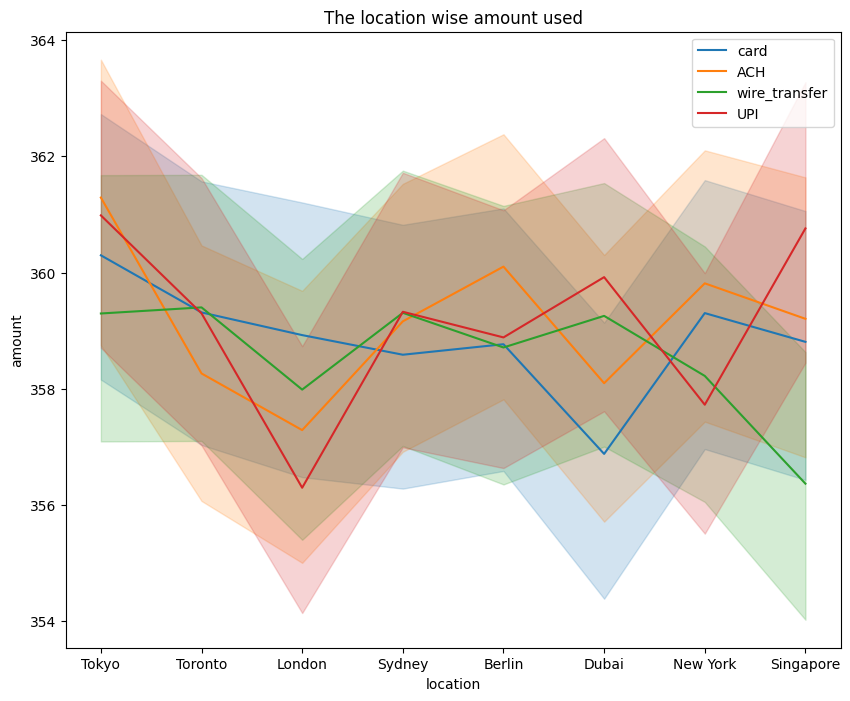

In [17]:
plt.figure(figsize=(10,8))
sns.lineplot(x='location', y='amount', data=df, hue='payment_channel')
plt.title('The location wise amount used')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


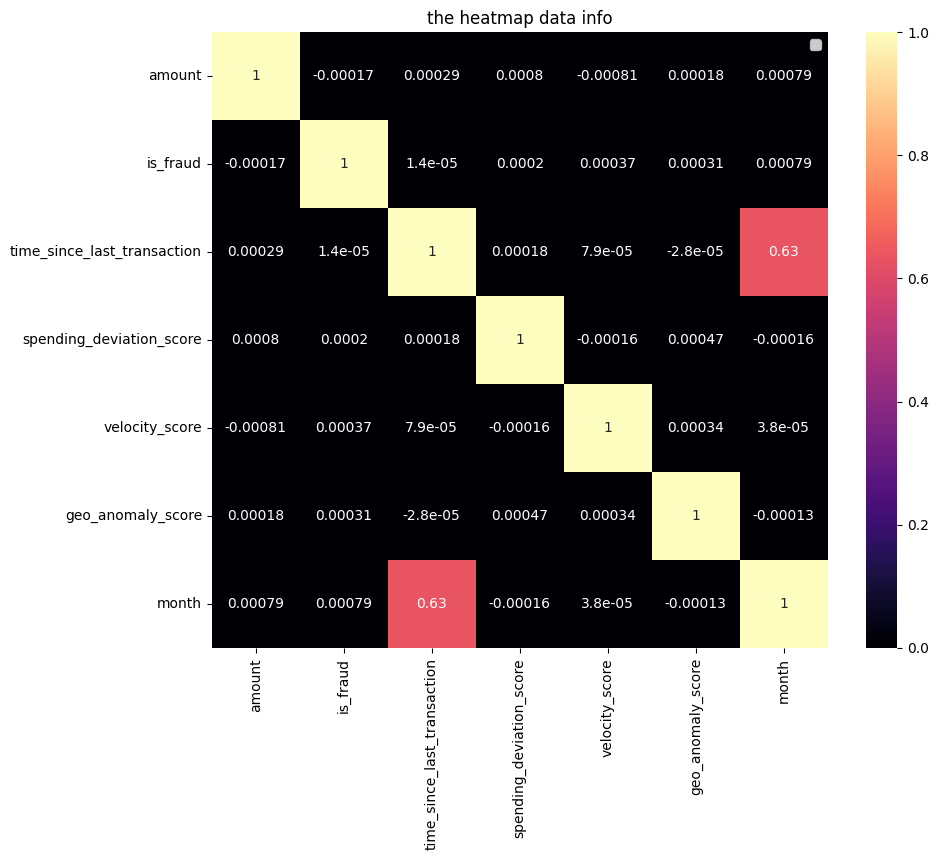

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,square=True,cmap='magma')
plt.title('the heatmap data info')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


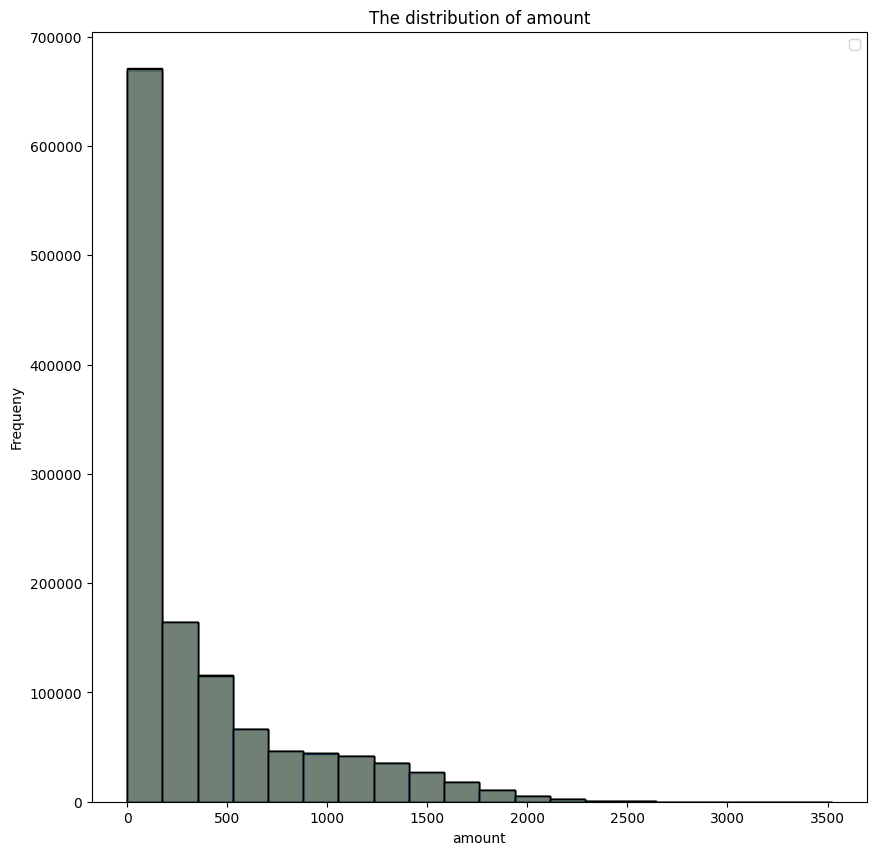

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


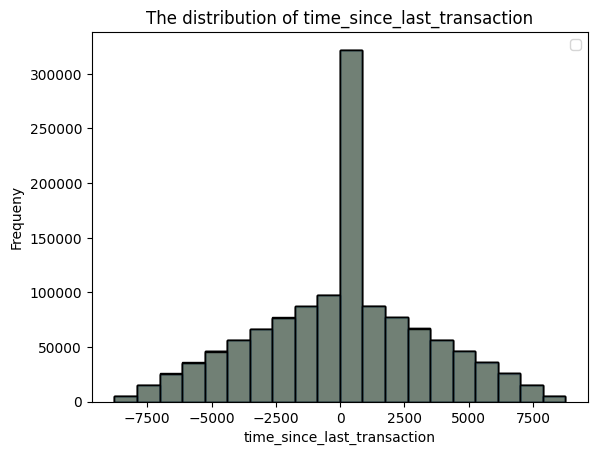

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


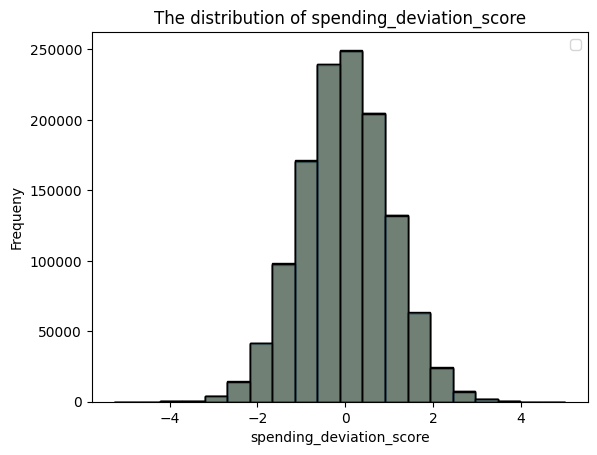

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


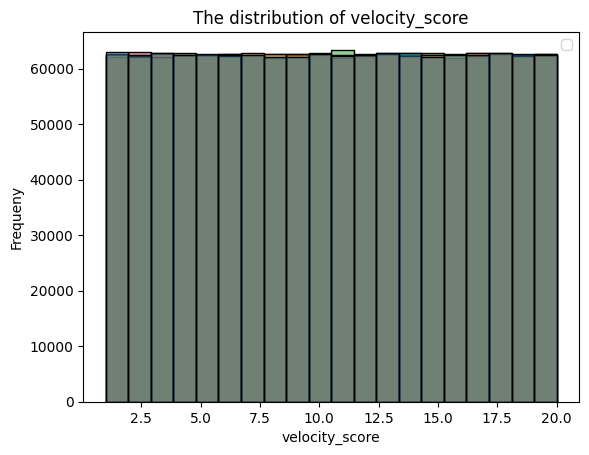

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


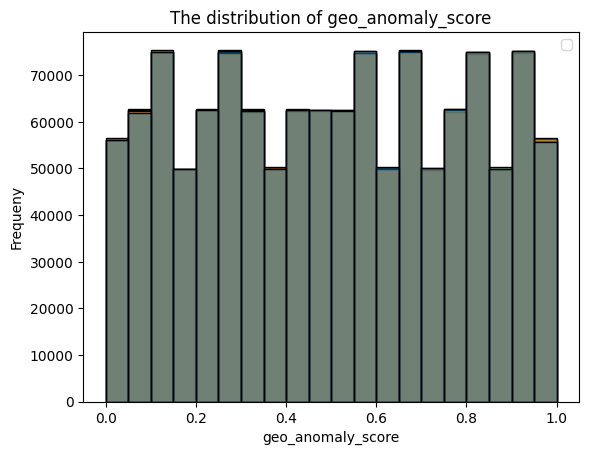

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


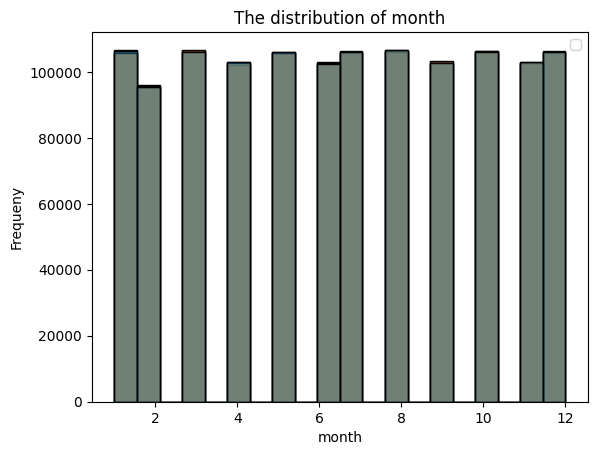

In [20]:
numerical_col = df.select_dtypes(include=np.number).columns 

plt.figure(figsize=(10,10))
for col in numerical_col:
    sns.histplot(x=col,data=df,bins=20,hue='payment_channel')
    plt.ylabel('Frequeny')
    plt.title(f'The distribution of {col}')
    plt.legend()
    plt.show()

In [ ]:
### Shows the distribution for all the categorical columns in the data
category_col = df.select_dtypes(include='object').columns 

plt.figure(figsize=(10,8))
for col in category_col:
    sns.countplot(x=col,data=df,hue='transaction_type')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'The distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df,markers='D')
plt.title('The pairplot data info')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=df,fill=True)
plt.title('The kdeplot data info')
plt.show()
